In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
train_orig = pd.read_csv("train.csv")  #загрузка train-df для обучения модели
train_orig

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,37576,Male,46,Returning,Business,Business,1608,0,0.0,1,...,5,5,5,3,2,5,1,5,5,Satisfied
1,56913,Male,30,Returning,Business,Business,1379,30,32.0,5,...,3,1,5,1,1,3,1,1,3,Neutral or Dissatisfied
2,6541,Female,50,Returning,Business,Business,414,0,0.0,5,...,4,5,4,5,3,4,5,4,4,Satisfied
3,40646,Female,48,Returning,Business,Economy,95,0,0.0,3,...,5,1,5,2,1,5,5,5,5,Satisfied
4,29947,Female,24,Returning,Business,Economy Plus,143,0,0.0,5,...,5,1,2,1,1,3,0,1,5,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84962,53730,Male,49,First-time,Business,Business,1310,0,0.0,3,...,4,3,2,3,3,4,4,3,4,Neutral or Dissatisfied
84963,82113,Male,7,Returning,Personal,Economy Plus,650,0,0.0,3,...,2,1,4,1,1,4,2,1,3,Neutral or Dissatisfied
84964,54411,Female,19,Returning,Personal,Economy,363,0,0.0,5,...,5,5,3,5,5,5,3,5,5,Neutral or Dissatisfied
84965,15247,Male,58,Returning,Business,Business,3445,9,5.0,1,...,5,5,5,3,5,5,1,5,5,Satisfied


In [ ]:
train_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84967 entries, 0 to 84966
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      84967 non-null  int64  
 1   Gender                                  84967 non-null  object 
 2   Age                                     84967 non-null  int64  
 3   Customer Type                           84967 non-null  object 
 4   Type of Travel                          84967 non-null  object 
 5   Class                                   84967 non-null  object 
 6   Flight Distance                         84967 non-null  int64  
 7   Departure Delay                         84967 non-null  int64  
 8   Arrival Delay                           84705 non-null  float64
 9   Departure and Arrival Time Convenience  84967 non-null  int64  
 10  Ease of Online Booking                  84967 non-null  in

In [ ]:
train = train_orig

In [ ]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from IPython.display import Markdown, display
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import json

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = train.drop('ID', axis = 1)

In [ ]:
train

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,46,Returning,Business,Business,1608,0,0.0,1,1,...,5,5,5,3,2,5,1,5,5,Satisfied
1,Male,30,Returning,Business,Business,1379,30,32.0,5,5,...,3,1,5,1,1,3,1,1,3,Neutral or Dissatisfied
2,Female,50,Returning,Business,Business,414,0,0.0,5,4,...,4,5,4,5,3,4,5,4,4,Satisfied
3,Female,48,Returning,Business,Economy,95,0,0.0,3,3,...,5,1,5,2,1,5,5,5,5,Satisfied
4,Female,24,Returning,Business,Economy Plus,143,0,0.0,5,0,...,5,1,2,1,1,3,0,1,5,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84962,Male,49,First-time,Business,Business,1310,0,0.0,3,3,...,4,3,2,3,3,4,4,3,4,Neutral or Dissatisfied
84963,Male,7,Returning,Personal,Economy Plus,650,0,0.0,3,2,...,2,1,4,1,1,4,2,1,3,Neutral or Dissatisfied
84964,Female,19,Returning,Personal,Economy,363,0,0.0,5,3,...,5,5,3,5,5,5,3,5,5,Neutral or Dissatisfied
84965,Male,58,Returning,Business,Business,3445,9,5.0,1,1,...,5,5,5,3,5,5,1,5,5,Satisfied


In [ ]:
def list_column_values(df, number_of_values, print_all):
    display(Markdown('**Results:**' ))
    for col in df.columns[0:]:
        if df[col].nunique() <= number_of_values:
            print(f"{col.ljust(25)}" +  ' ==> ' + str(df[col].sort_values().unique().tolist()) )
        else:
            if print_all=='True':
               print(f"{col.ljust(25)}" + ' ==> more than ' + str(number_of_values) + ' values')

In [ ]:
list_column_values(train,3,'False')

**Results:**

Gender                    ==> ['Female', 'Male']
Customer Type             ==> ['First-time', 'Returning']
Type of Travel            ==> ['Business', 'Personal']
Class                     ==> ['Business', 'Economy', 'Economy Plus']
Satisfaction              ==> ['Neutral or Dissatisfied', 'Satisfied']


In [ ]:
train['Type of Travel'].replace('Business', 1, inplace=True)
train['Type of Travel'].replace('Personal', 0, inplace=True)

In [ ]:
train['Customer Type'].replace('Returning', 1, inplace=True)
train['Customer Type'].replace('First-time', 0, inplace=True)

In [ ]:
train['Gender'].replace('Female', 0, inplace=True)
train['Gender'].replace('Male', 1, inplace=True)

In [ ]:
train['Class'].replace('Economy', 0, inplace=True)
train['Class'].replace('Economy Plus', 1, inplace=True)
train['Class'].replace('Business', 2, inplace=True)

In [ ]:
train['Satisfaction'].replace('Neutral or Dissatisfied', 0, inplace=True)
train['Satisfaction'].replace('Satisfied', 1, inplace=True)

In [ ]:
train

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,46,1,1,2,1608,0,0.0,1,1,...,5,5,5,3,2,5,1,5,5,1
1,1,30,1,1,2,1379,30,32.0,5,5,...,3,1,5,1,1,3,1,1,3,0
2,0,50,1,1,2,414,0,0.0,5,4,...,4,5,4,5,3,4,5,4,4,1
3,0,48,1,1,0,95,0,0.0,3,3,...,5,1,5,2,1,5,5,5,5,1
4,0,24,1,1,1,143,0,0.0,5,0,...,5,1,2,1,1,3,0,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84962,1,49,0,1,2,1310,0,0.0,3,3,...,4,3,2,3,3,4,4,3,4,0
84963,1,7,1,0,1,650,0,0.0,3,2,...,2,1,4,1,1,4,2,1,3,0
84964,0,19,1,0,0,363,0,0.0,5,3,...,5,5,3,5,5,5,3,5,5,0
84965,1,58,1,1,2,3445,9,5.0,1,1,...,5,5,5,3,5,5,1,5,5,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84967 entries, 0 to 84966
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Gender                                  84967 non-null  int64  
 1   Age                                     84967 non-null  int64  
 2   Customer Type                           84967 non-null  int64  
 3   Type of Travel                          84967 non-null  int64  
 4   Class                                   84967 non-null  int64  
 5   Flight Distance                         84967 non-null  int64  
 6   Departure Delay                         84967 non-null  int64  
 7   Arrival Delay                           84705 non-null  float64
 8   Departure and Arrival Time Convenience  84967 non-null  int64  
 9   Ease of Online Booking                  84967 non-null  int64  
 10  Check-in Service                        84967 non-null  in

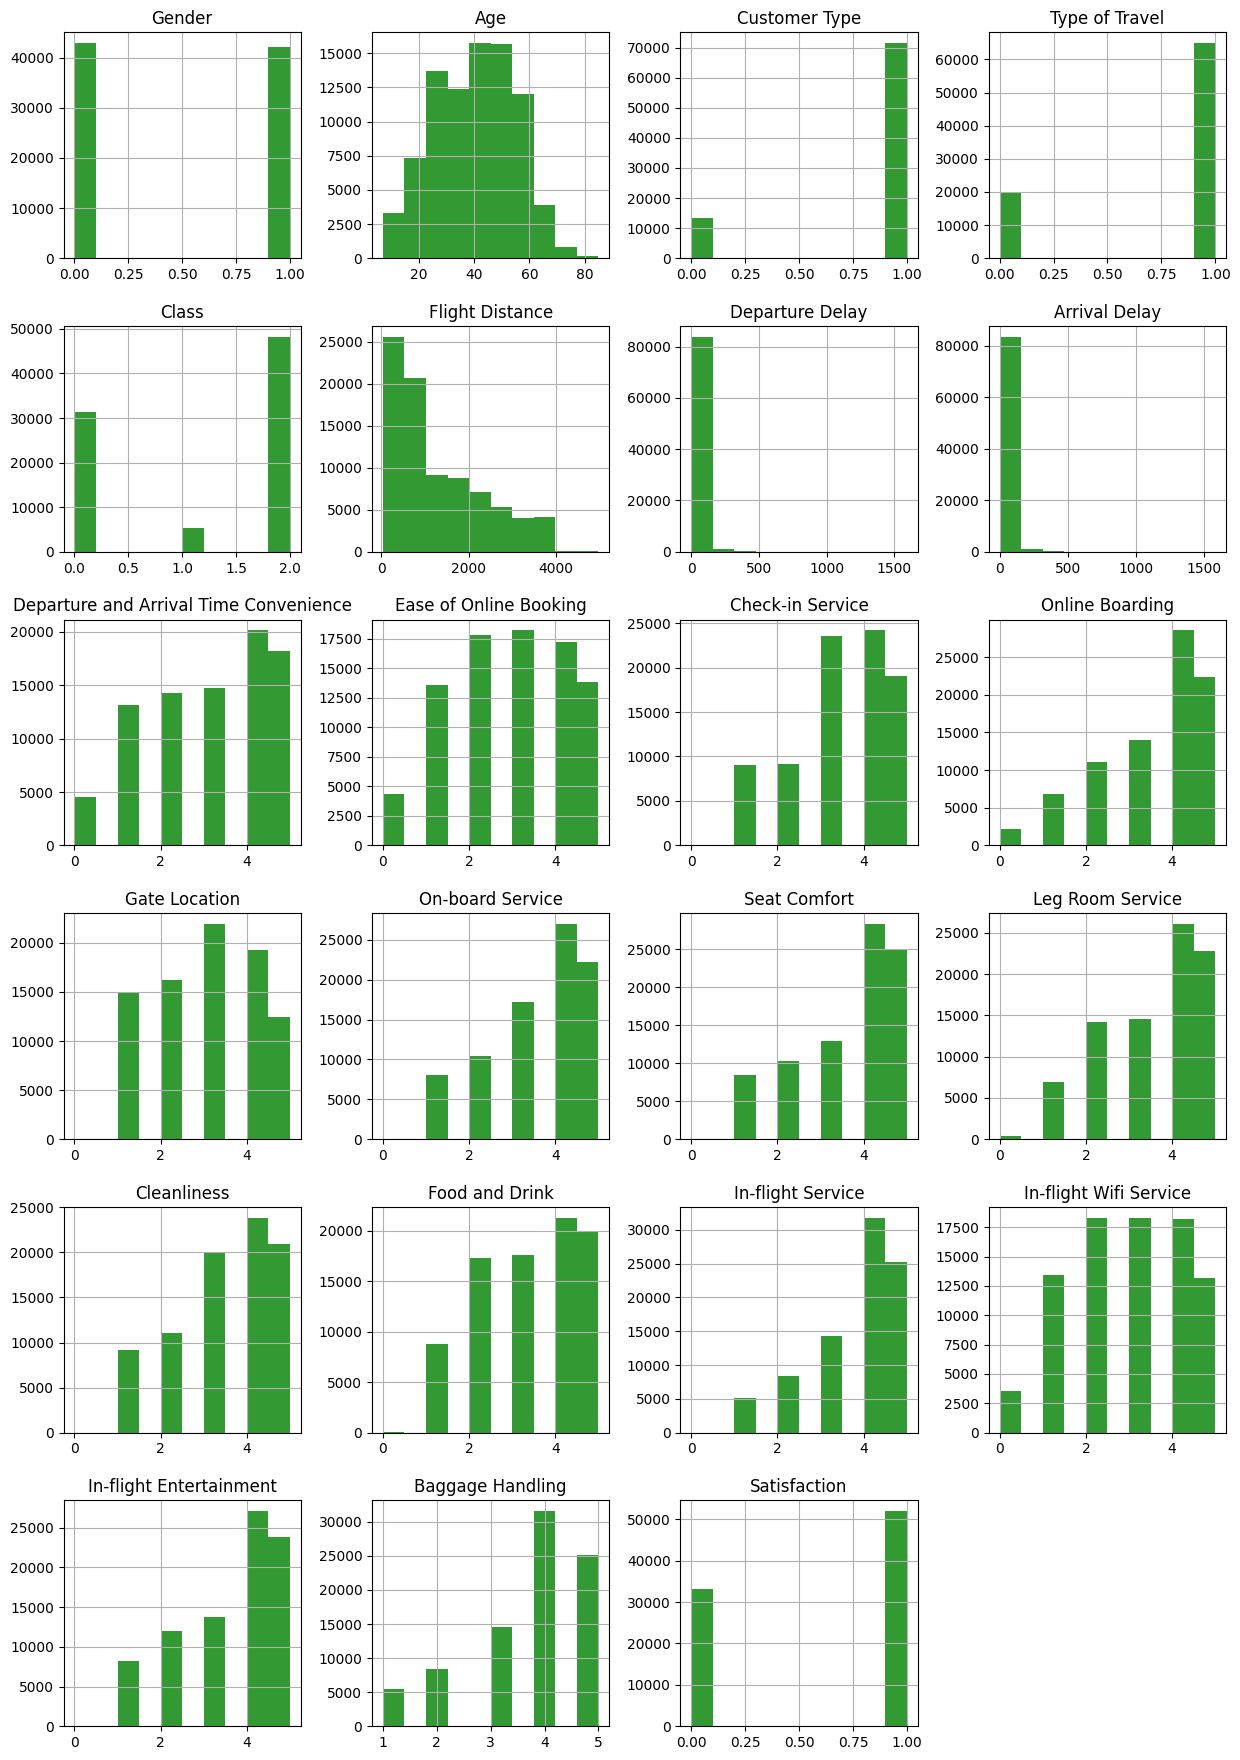

In [ ]:
hist = train.hist(figsize = (15, 22), layout=(6, 4) , color='green',alpha=0.8 )

<Axes: >

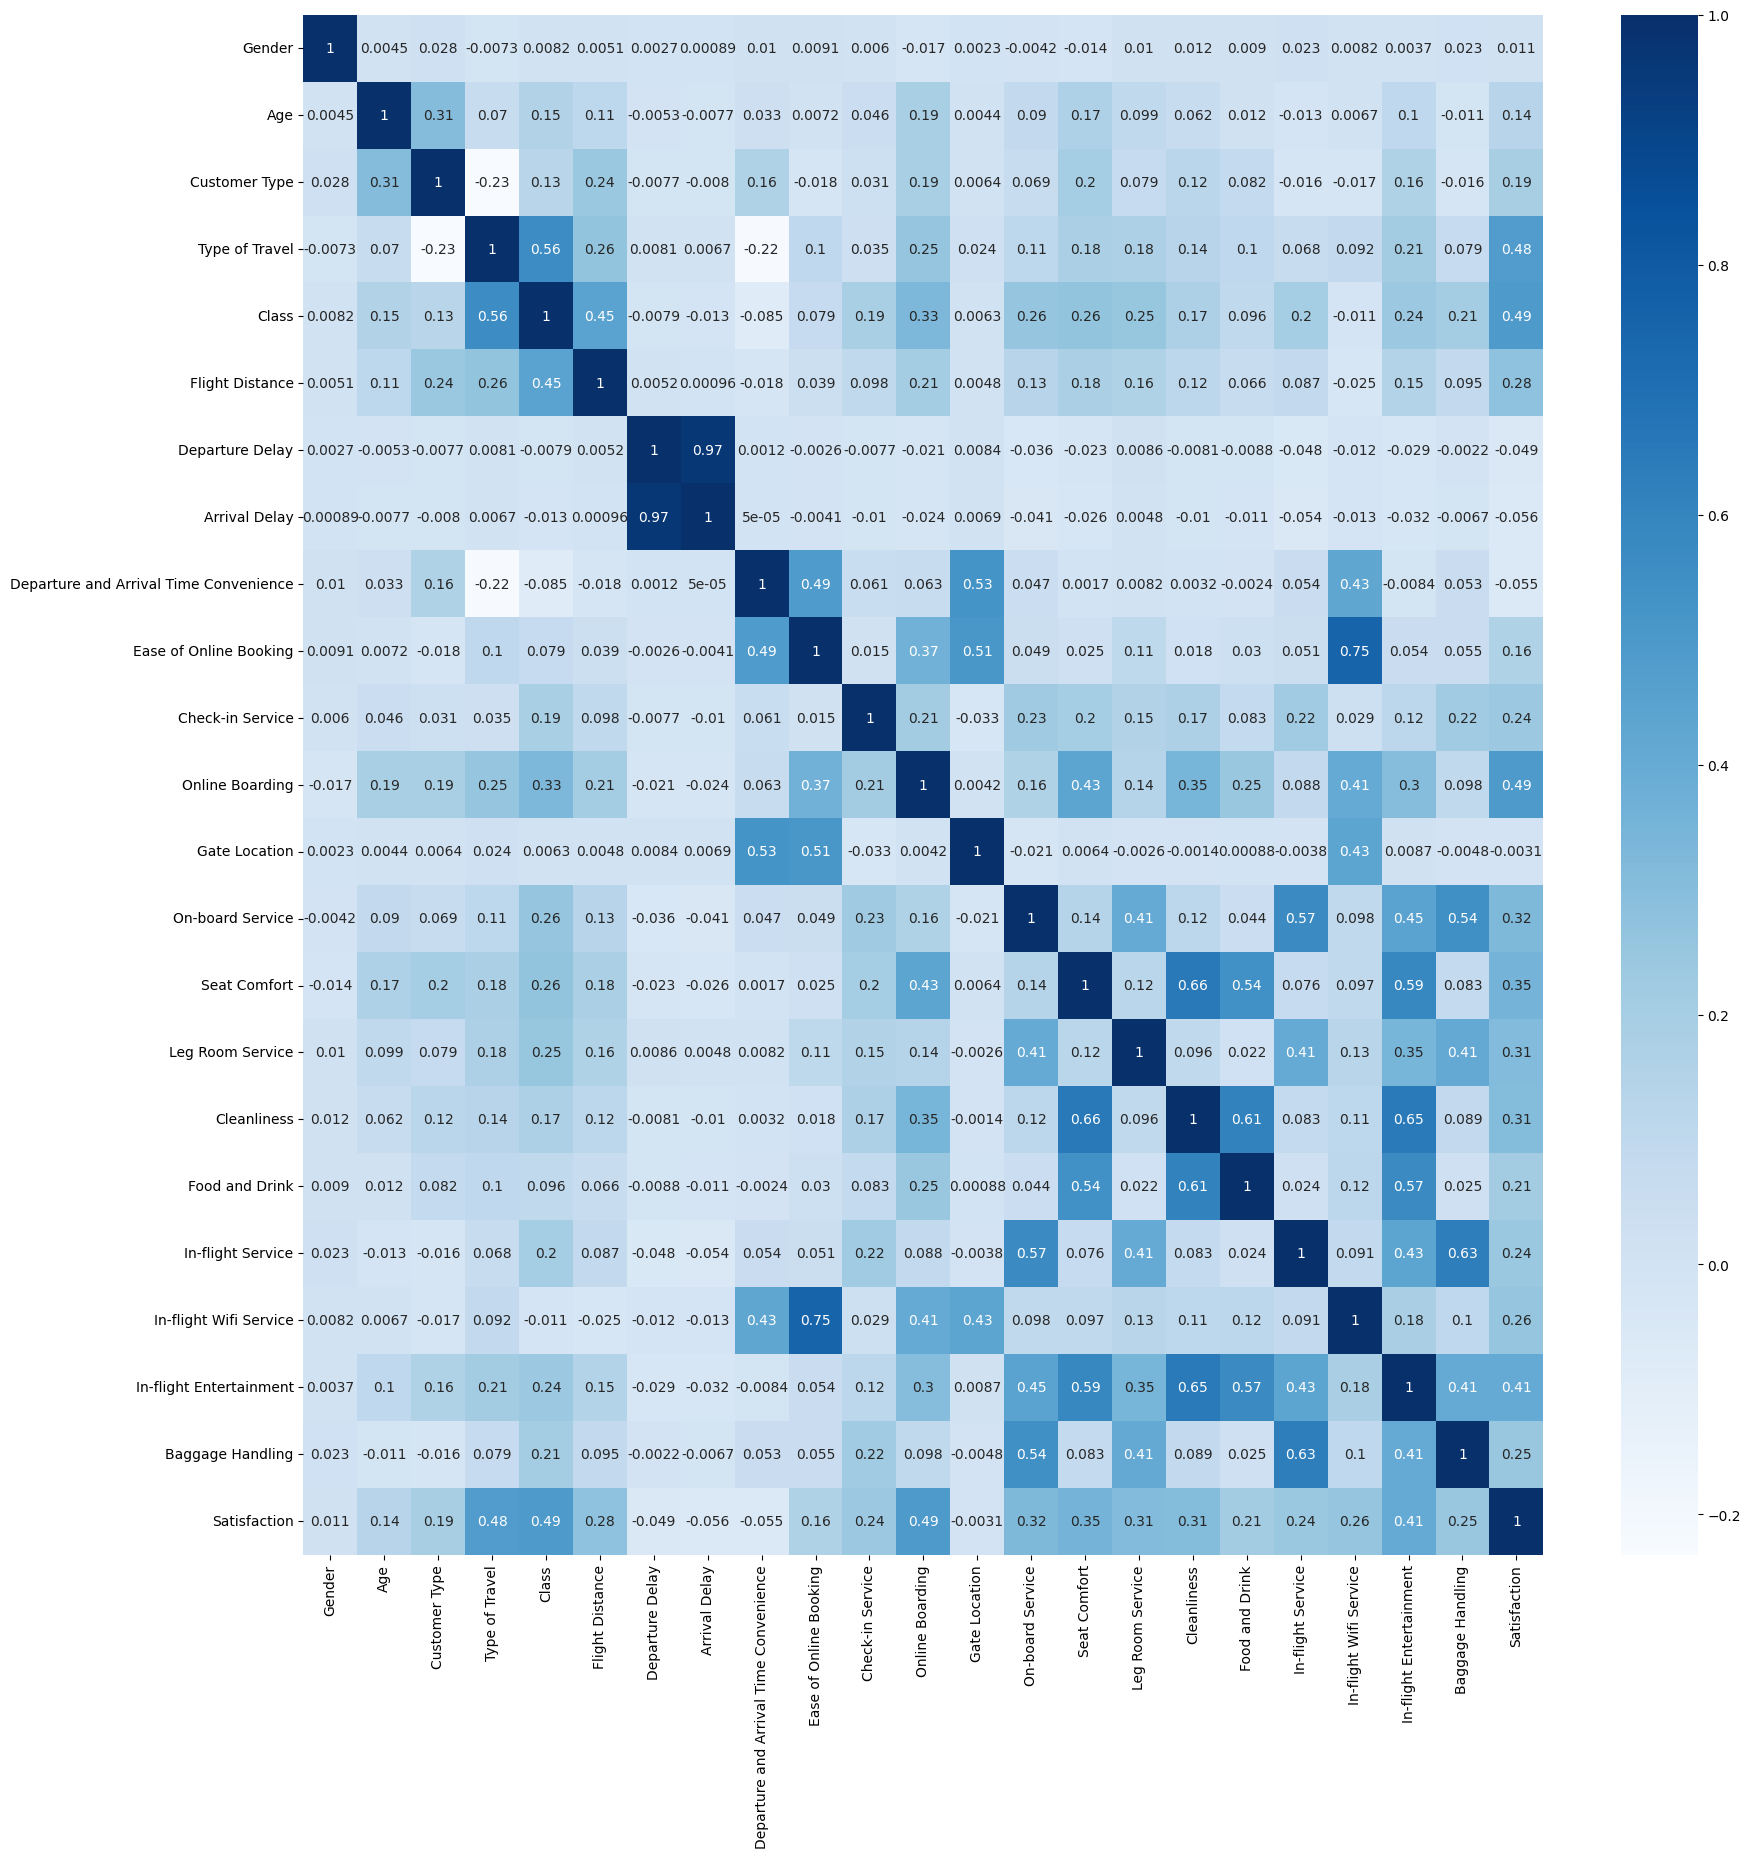

In [ ]:
plt.subplots(figsize=(20,20))
data = train.corr()
sns.heatmap(data, cmap ='Blues', annot=True, annot_kws={"size": 10})

Получаем мультиколлинеарную матрицу, так есть две пары коллинеарных признаков

Первая пара: 'Arrival Delay' и 'Departure Delay'

Вторая пара: 'Ease of Online Booking' 'In-flight Service'

In [ ]:
train = train.drop('Arrival Delay', axis = 1)

In [ ]:
train = train.drop('Ease of Online Booking', axis = 1)

In [ ]:
x = train.drop('Satisfaction', axis=1) #удаление указанного столбца

In [ ]:
x

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,1,46,1,1,2,1608,0,1,5,4,1,5,5,5,3,2,5,1,5,5
1,1,30,1,1,2,1379,30,5,1,1,5,3,1,5,1,1,3,1,1,3
2,0,50,1,1,2,414,0,5,4,4,5,4,5,4,5,3,4,5,4,4
3,0,48,1,1,0,95,0,3,1,2,3,5,1,5,2,1,5,5,5,5
4,0,24,1,1,1,143,0,5,4,0,4,5,1,2,1,1,3,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84962,1,49,0,1,2,1310,0,3,3,4,3,4,3,2,3,3,4,4,3,4
84963,1,7,1,0,1,650,0,3,2,2,3,2,1,4,1,1,4,2,1,3
84964,0,19,1,0,0,363,0,5,5,3,3,5,5,3,5,5,5,3,5,5
84965,1,58,1,1,2,3445,9,1,3,4,1,5,5,5,3,5,5,1,5,5


In [ ]:
y = train['Satisfaction']

In [ ]:
y

,Satisfaction
0,1
1,0
2,1
3,1
4,1
...,...
84962,0
84963,0
84964,0
84965,1


In [ ]:
print(f'Features size: {x.shape}')
print(f'Target size: {y.shape}')  #Удостоверимся в том, что размер эталонного вектора и кол-во строк с показателями здоровья совпадают

Features size: (84967, 20)
Target size: (84967,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
std = StandardScaler()  #Произведём масштабирование данных с помощью стандартизации (вычитание матожидания плюс деление на ско)

x_std = std.fit_transform(x)

x_std = pd.DataFrame(x_std, columns=x.columns)
x_std.describe()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04
mean,-7.994620e-17,2.333158e-16,2.793099e-17,7.392514e-17,4.515789e-17,6.397368e-18,5.017544e-18,-4.147836e-17,-5.598743e-17,-1.200865e-16,-3.311579e-17,1.075427e-16,5.552748e-17,-1.001000e-16,-1.230971e-16,-1.003509e-16,-3.269766e-17,-2.977076e-17,-4.850292e-17,-8.404386e-17
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-9.896146e-01,-2.289857e+00,-2.306629e+00,-1.801964e+00,-1.263867e+00,-1.203027e+00,-3.742322e-01,-1.975379e+00,-2.746673e+00,-2.583819e+00,-2.274721e+00,-2.803154e+00,-2.788793e+00,-2.712095e+00,-2.671722e+00,-2.519561e+00,-3.225324e+00,-2.004837e+00,-2.739896e+00,-2.342877e+00
25%,-9.896146e-01,-7.692037e-01,4.335330e-01,5.549499e-01,-1.263867e+00,-8.158374e-01,-3.742322e-01,-6.718985e-01,-3.318914e-01,-3.656823e-01,-7.460059e-01,-4.208899e-01,-4.656023e-01,-1.161531e+00,-3.333517e-01,-9.945825e-01,-6.422658e-01,-6.055271e-01,-4.214482e-01,-6.300877e-01
50%,-9.896146e-01,6.024371e-02,4.335330e-01,5.549499e-01,8.461668e-01,-3.525418e-01,-3.742322e-01,-2.015810e-02,4.730357e-01,3.736968e-01,1.835171e-02,3.731981e-01,3.087944e-01,3.890324e-01,4.461049e-01,-2.320932e-01,2.187534e-01,9.412778e-02,3.513676e-01,2.263071e-01
75%,1.010494e+00,7.514499e-01,4.335330e-01,5.549499e-01,8.461668e-01,6.501554e-01,-8.111617e-02,6.315823e-01,4.730357e-01,1.113076e+00,7.827094e-01,1.167286e+00,1.083191e+00,1.164314e+00,4.461049e-01,5.303961e-01,1.079773e+00,7.937827e-01,1.124183e+00,1.082702e+00
max,1.010494e+00,3.101551e+00,4.335330e-01,5.549499e-01,8.461668e-01,3.507938e+00,4.204766e+01,1.283323e+00,1.277963e+00,1.113076e+00,1.547067e+00,1.167286e+00,1.083191e+00,1.164314e+00,1.225562e+00,1.292885e+00,1.079773e+00,1.493438e+00,1.124183e+00,1.082702e+00


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.15, random_state=42)

print(f'Train dataset size: {x_train.shape}, {y_train.shape}')
print(f'Test dataset size: {x_test.shape}, {y_test.shape}')

Train dataset size: (72221, 20), (72221,)
Test dataset size: (12746, 20), (12746,)


In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Для бинарной классификации
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Выводим метрики
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9574768554840735
Precision: 0.9675592173017508
Recall: 0.9628490904432487
F1 Score: 0.9651984076024143


In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(x_std, y)

RandomForestClassifier(random_state=42)

--------------------------------------------------------------------------------

In [ ]:
test_orig = pd.read_csv("test.csv")  #загрузка test-df для тестинга модели
test_orig

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,98190,Female,46,First-time,Business,Economy,978,0,8.0,3,...,1,4,5,4,5,5,1,3,5,2
1,107961,Female,21,First-time,Business,Economy,1005,0,20.0,1,...,3,3,4,4,4,4,4,1,4,4
2,129503,Female,39,Returning,Personal,Economy,954,18,3.0,5,...,2,4,5,3,3,3,5,1,3,5
3,92408,Male,22,Returning,Personal,Business,765,0,0.0,5,...,3,5,2,2,2,2,5,2,2,5
4,117611,Male,48,Returning,Business,Business,2123,9,0.0,4,...,4,2,4,2,3,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44908,117154,Male,64,Returning,Business,Business,1947,27,17.0,5,...,5,1,3,1,2,1,1,1,1,1
44909,101603,Female,23,First-time,Business,Economy,1180,0,0.0,4,...,1,3,1,5,2,2,4,4,2,4
44910,105970,Male,50,Returning,Business,Economy,451,0,0.0,2,...,2,2,1,5,1,1,1,1,1,1
44911,89524,Female,49,First-time,Business,Business,227,4,9.0,2,...,3,1,5,5,3,3,3,2,3,4


In [ ]:
test = test_orig

In [ ]:
test = test.drop('ID', axis = 1)

In [ ]:
test['Type of Travel'].replace('Business', 1, inplace=True)
test['Type of Travel'].replace('Personal', 0, inplace=True)

In [ ]:
test['Customer Type'].replace('Returning', 1, inplace=True)
test['Customer Type'].replace('First-time', 0, inplace=True)

In [ ]:
test['Gender'].replace('Female', 0, inplace=True)
test['Gender'].replace('Male', 1, inplace=True)

In [ ]:
test['Class'].replace('Economy', 0, inplace=True)
test['Class'].replace('Economy Plus', 1, inplace=True)
test['Class'].replace('Business', 2, inplace=True)

In [ ]:
test = test.drop('Arrival Delay', axis = 1)

In [ ]:
test = test.drop('Ease of Online Booking', axis = 1)

In [ ]:
x_test_std = std.transform(test)

x_test_std = pd.DataFrame(x_test_std, columns=x.columns)
x_test_std.describe()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,44913.000000,44913.000000,44913.000000,44913.000000,44913.000000,44913.000000,44913.000000,44913.000000,44913.000000,44913.000000,44913.000000,44913.000000,44913.000000,44913.000000,44913.000000,44913.000000,44913.000000,44913.000000,44913.000000,44913.000000
mean,-0.012517,-0.140013,-0.197132,-0.504095,-0.513495,-0.289585,0.051598,0.050265,-0.246870,-0.517318,0.002065,-0.337579,-0.358046,-0.330304,-0.318600,-0.219649,-0.258313,-0.276722,-0.418506,-0.256644
std,0.999802,1.119669,1.153437,1.172405,0.958341,0.810650,1.040481,0.984747,1.035454,0.904084,0.932681,1.026889,1.021138,1.023820,1.036254,1.024854,1.016275,0.748092,1.033120,1.009132
min,-0.989615,-2.289857,-2.306629,-1.801964,-1.263867,-1.203027,-0.374232,-1.975379,-1.941746,-2.583819,-1.510364,-2.803154,-2.014396,-2.712095,-2.671722,-2.519561,-3.225324,-2.004837,-2.739896,-2.342877
25%,-0.989615,-1.045686,0.433533,-1.801964,-1.263867,-0.864355,-0.374232,-0.671898,-1.136818,-1.105061,-0.746006,-1.214978,-1.239999,-1.161531,-1.112808,-0.994583,-0.642266,-0.605527,-1.194264,-0.630088
50%,-0.989615,-0.216239,0.433533,0.554950,-1.263867,-0.570395,-0.374232,-0.020158,-0.331891,-0.365682,0.018352,-0.420890,-0.465602,-0.386249,-0.333352,-0.232093,0.218753,-0.605527,-0.421448,0.226307
75%,1.010494,0.682329,0.433533,0.554950,0.846167,-0.044312,-0.001175,0.631582,0.473036,0.373697,0.782709,0.373198,0.308794,0.389032,0.446105,0.530396,0.218753,0.094128,0.351368,0.226307
max,1.010494,3.101551,0.433533,0.554950,0.846167,3.507938,29.683487,1.283323,1.277963,1.113076,1.547067,1.167286,1.083191,1.164314,1.225562,1.292885,1.079773,1.493438,1.124183,1.082702


In [ ]:
y_res = model.predict(x_test_std)

In [ ]:
df_res = pd.DataFrame()
df_res['Satisfaction'] = y_res
df_res

,Satisfaction
0,0
1,0
2,0
3,0
4,0
...,...
44908,0
44909,1
44910,0
44911,0


In [ ]:
new_df = pd.DataFrame({
    'ID': test_orig['ID'],  # Первый столбец - ID
    'Datisfaction': df_res['Satisfaction']  # Второй столбец - Satisfaction
})

In [ ]:
new_df

,ID,Datisfaction
0,98190,0
1,107961,0
2,129503,0
3,92408,0
4,117611,0
...,...,...
44908,117154,0
44909,101603,1
44910,105970,0
44911,89524,0


In [ ]:
new_df.to_csv('output.csv', index=False)

--------------------------------------------------------------------------------

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.8 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=100)
model.fit(x_train, y_train)

0:	learn: 0.5312283	total: 153ms	remaining: 2m 32s
100:	learn: 0.1000757	total: 8.39s	remaining: 1m 14s
200:	learn: 0.0839608	total: 14.3s	remaining: 56.7s
300:	learn: 0.0762173	total: 19.3s	remaining: 44.8s
400:	learn: 0.0710144	total: 26.4s	remaining: 39.4s
500:	learn: 0.0663620	total: 29.4s	remaining: 29.3s
600:	learn: 0.0626789	total: 31.3s	remaining: 20.8s
700:	learn: 0.0593883	total: 33.2s	remaining: 14.1s
800:	learn: 0.0563922	total: 36.2s	remaining: 9s
900:	learn: 0.0535298	total: 39.1s	remaining: 4.29s
999:	learn: 0.0509629	total: 41s	remaining: 0us


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Для бинарной классификации
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
conf_matrix = confusion_matrix(y_test, y_pred)

# Выводим метрики
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.9601443590145928
Precision: 0.9683008213552361
Recall: 0.9665641813989239
F1 Score: 0.967431722015643
Confusion Matrix:
 [[4693  247]
 [ 261 7545]]


In [ ]:
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=100)
model.fit(x_std, y)

0:	learn: 0.5305998	total: 26.3ms	remaining: 26.3s
100:	learn: 0.0981430	total: 2.26s	remaining: 20.1s
200:	learn: 0.0846774	total: 4.41s	remaining: 17.5s
300:	learn: 0.0778096	total: 8.35s	remaining: 19.4s
400:	learn: 0.0728065	total: 10.8s	remaining: 16.2s
500:	learn: 0.0681363	total: 13s	remaining: 12.9s
600:	learn: 0.0652357	total: 15.1s	remaining: 10s
700:	learn: 0.0617085	total: 17.3s	remaining: 7.37s
800:	learn: 0.0591784	total: 20s	remaining: 4.98s
900:	learn: 0.0567029	total: 23.6s	remaining: 2.59s
999:	learn: 0.0544911	total: 25.7s	remaining: 0us


In [ ]:
y_res = model.predict(x_test_std)

In [ ]:
df_res = pd.DataFrame()
df_res['Satisfaction'] = y_res
df_res

,Satisfaction
0,0
1,0
2,0
3,0
4,0
...,...
44908,0
44909,1
44910,0
44911,0


In [ ]:
new_df = pd.DataFrame({
    'ID': test_orig['ID'],  # Первый столбец - ID
    'Datisfaction': df_res['Satisfaction']  # Второй столбец - Satisfaction
})

In [ ]:
new_df.to_csv('output.csv', index=False)

--------------------------------------------------------------------------------

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
train_orig = pd.read_csv("train.csv")  #загрузка train-df для обучения модели
train_orig

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,37576,Male,46,Returning,Business,Business,1608,0,0.0,1,...,5,5,5,3,2,5,1,5,5,Satisfied
1,56913,Male,30,Returning,Business,Business,1379,30,32.0,5,...,3,1,5,1,1,3,1,1,3,Neutral or Dissatisfied
2,6541,Female,50,Returning,Business,Business,414,0,0.0,5,...,4,5,4,5,3,4,5,4,4,Satisfied
3,40646,Female,48,Returning,Business,Economy,95,0,0.0,3,...,5,1,5,2,1,5,5,5,5,Satisfied
4,29947,Female,24,Returning,Business,Economy Plus,143,0,0.0,5,...,5,1,2,1,1,3,0,1,5,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84962,53730,Male,49,First-time,Business,Business,1310,0,0.0,3,...,4,3,2,3,3,4,4,3,4,Neutral or Dissatisfied
84963,82113,Male,7,Returning,Personal,Economy Plus,650,0,0.0,3,...,2,1,4,1,1,4,2,1,3,Neutral or Dissatisfied
84964,54411,Female,19,Returning,Personal,Economy,363,0,0.0,5,...,5,5,3,5,5,5,3,5,5,Neutral or Dissatisfied
84965,15247,Male,58,Returning,Business,Business,3445,9,5.0,1,...,5,5,5,3,5,5,1,5,5,Satisfied


In [ ]:
train = train_orig

In [ ]:
train = train.drop('ID', axis = 1)

In [ ]:
train['Type of Travel'].replace('Business', 1, inplace=True)
train['Type of Travel'].replace('Personal', 0, inplace=True)

In [ ]:
train['Customer Type'].replace('Returning', 1, inplace=True)
train['Customer Type'].replace('First-time', 0, inplace=True)

In [ ]:
train['Gender'].replace('Female', 0, inplace=True)
train['Gender'].replace('Male', 1, inplace=True)

In [ ]:
train['Class'].replace('Economy', 0, inplace=True)
train['Class'].replace('Economy Plus', 1, inplace=True)
train['Class'].replace('Business', 2, inplace=True)

In [ ]:
train['Satisfaction'].replace('Neutral or Dissatisfied', 0, inplace=True)
train['Satisfaction'].replace('Satisfied', 1, inplace=True)

In [ ]:
train = train.drop('Arrival Delay', axis = 1)

In [ ]:
train = train.drop('In-flight Service', axis = 1)

In [ ]:
x = train.drop('Satisfaction', axis=1) #удаление указанного столбца

In [ ]:
y = train['Satisfaction']

In [ ]:
std = StandardScaler()  #Произведём масштабирование данных с помощью стандартизации (вычитание матожидания плюс деление на ско)

x_std = std.fit_transform(x)

x_std = pd.DataFrame(x_std, columns=x.columns)
x_std.describe()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04,8.496700e+04
mean,-7.994620e-17,2.333158e-16,2.793099e-17,7.392514e-17,4.515789e-17,6.397368e-18,5.017544e-18,-4.147836e-17,-8.161871e-17,-5.598743e-17,-1.200865e-16,-3.311579e-17,1.075427e-16,5.552748e-17,-1.001000e-16,-1.230971e-16,-1.003509e-16,-2.977076e-17,-4.850292e-17,-8.404386e-17
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-9.896146e-01,-2.289857e+00,-2.306629e+00,-1.801964e+00,-1.263867e+00,-1.203027e+00,-3.742322e-01,-1.975379e+00,-1.945872e+00,-2.746673e+00,-2.583819e+00,-2.274721e+00,-2.803154e+00,-2.788793e+00,-2.712095e+00,-2.671722e+00,-2.519561e+00,-2.004837e+00,-2.739896e+00,-2.342877e+00
25%,-9.896146e-01,-7.692037e-01,4.335330e-01,5.549499e-01,-1.263867e+00,-8.158374e-01,-3.742322e-01,-6.718985e-01,-5.779304e-01,-3.318914e-01,-3.656823e-01,-7.460059e-01,-4.208899e-01,-4.656023e-01,-1.161531e+00,-3.333517e-01,-9.945825e-01,-6.055271e-01,-4.214482e-01,-6.300877e-01
50%,-9.896146e-01,6.024371e-02,4.335330e-01,5.549499e-01,8.461668e-01,-3.525418e-01,-3.742322e-01,-2.015810e-02,1.060406e-01,4.730357e-01,3.736968e-01,1.835171e-02,3.731981e-01,3.087944e-01,3.890324e-01,4.461049e-01,-2.320932e-01,9.412778e-02,3.513676e-01,2.263071e-01
75%,1.010494e+00,7.514499e-01,4.335330e-01,5.549499e-01,8.461668e-01,6.501554e-01,-8.111617e-02,6.315823e-01,7.900116e-01,4.730357e-01,1.113076e+00,7.827094e-01,1.167286e+00,1.083191e+00,1.164314e+00,4.461049e-01,5.303961e-01,7.937827e-01,1.124183e+00,1.082702e+00
max,1.010494e+00,3.101551e+00,4.335330e-01,5.549499e-01,8.461668e-01,3.507938e+00,4.204766e+01,1.283323e+00,1.473983e+00,1.277963e+00,1.113076e+00,1.547067e+00,1.167286e+00,1.083191e+00,1.164314e+00,1.225562e+00,1.292885e+00,1.493438e+00,1.124183e+00,1.082702e+00


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.15, random_state=42)

print(f'Train dataset size: {x_train.shape}, {y_train.shape}')
print(f'Test dataset size: {x_test.shape}, {y_test.shape}')

Train dataset size: (72221, 20), (72221,)
Test dataset size: (12746, 20), (12746,)


In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Для бинарной классификации
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Выводим метрики
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.955436999843088
Precision: 0.9640933572710951
Recall: 0.9631053036126057
F1 Score: 0.9635990771597026


In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(x_std, y)

RandomForestClassifier(random_state=42)

In [ ]:
test_orig = pd.read_csv("test.csv")  #загрузка test-df для тестинга модели
test_orig

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,98190,Female,46,First-time,Business,Economy,978,0,8.0,3,...,1,4,5,4,5,5,1,3,5,2
1,107961,Female,21,First-time,Business,Economy,1005,0,20.0,1,...,3,3,4,4,4,4,4,1,4,4
2,129503,Female,39,Returning,Personal,Economy,954,18,3.0,5,...,2,4,5,3,3,3,5,1,3,5
3,92408,Male,22,Returning,Personal,Business,765,0,0.0,5,...,3,5,2,2,2,2,5,2,2,5
4,117611,Male,48,Returning,Business,Business,2123,9,0.0,4,...,4,2,4,2,3,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44908,117154,Male,64,Returning,Business,Business,1947,27,17.0,5,...,5,1,3,1,2,1,1,1,1,1
44909,101603,Female,23,First-time,Business,Economy,1180,0,0.0,4,...,1,3,1,5,2,2,4,4,2,4
44910,105970,Male,50,Returning,Business,Economy,451,0,0.0,2,...,2,2,1,5,1,1,1,1,1,1
44911,89524,Female,49,First-time,Business,Business,227,4,9.0,2,...,3,1,5,5,3,3,3,2,3,4


In [ ]:
test = test_orig

In [ ]:
test = test.drop('ID', axis = 1)

In [ ]:
test['Type of Travel'].replace('Business', 1, inplace=True)
test['Type of Travel'].replace('Personal', 0, inplace=True)

In [ ]:
test['Customer Type'].replace('Returning', 1, inplace=True)
test['Customer Type'].replace('First-time', 0, inplace=True)

In [ ]:
test['Gender'].replace('Female', 0, inplace=True)
test['Gender'].replace('Male', 1, inplace=True)

In [ ]:
test['Class'].replace('Economy', 0, inplace=True)
test['Class'].replace('Economy Plus', 1, inplace=True)
test['Class'].replace('Business', 2, inplace=True)

In [ ]:
test = test.drop('Arrival Delay', axis = 1)

In [ ]:
test = test.drop('In-flight Service', axis = 1)

In [ ]:
x_test_std = std.transform(test)

x_test_std = pd.DataFrame(x_test_std, columns=x.columns)
x_test_std.describe()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,44913.000000,44913.000000,44913.000000,44913.000000,44913.000000,44913.000000,44913.000000,44913.000000,44913.000000,44913.000000,44913.000000,44913.000000,44913.000000,44913.000000,44913.000000,44913.000000,44913.000000,44913.000000,44913.000000,44913.000000
mean,-0.012517,-0.140013,-0.197132,-0.504095,-0.513495,-0.289585,0.051598,0.050265,-0.174230,-0.246870,-0.517318,0.002065,-0.337579,-0.358046,-0.330304,-0.318600,-0.219649,-0.276722,-0.418506,-0.256644
std,0.999802,1.119669,1.153437,1.172405,0.958341,0.810650,1.040481,0.984747,0.863990,1.035454,0.904084,0.932681,1.026889,1.021138,1.023820,1.036254,1.024854,0.748092,1.033120,1.009132
min,-0.989615,-2.289857,-2.306629,-1.801964,-1.263867,-1.203027,-0.374232,-1.975379,-1.945872,-1.941746,-2.583819,-1.510364,-2.803154,-2.014396,-2.712095,-2.671722,-2.519561,-2.004837,-2.739896,-2.342877
25%,-0.989615,-1.045686,0.433533,-1.801964,-1.263867,-0.864355,-0.374232,-0.671898,-0.577930,-1.136818,-1.105061,-0.746006,-1.214978,-1.239999,-1.161531,-1.112808,-0.994583,-0.605527,-1.194264,-0.630088
50%,-0.989615,-0.216239,0.433533,0.554950,-1.263867,-0.570395,-0.374232,-0.020158,0.106041,-0.331891,-0.365682,0.018352,-0.420890,-0.465602,-0.386249,-0.333352,-0.232093,-0.605527,-0.421448,0.226307
75%,1.010494,0.682329,0.433533,0.554950,0.846167,-0.044312,-0.001175,0.631582,0.106041,0.473036,0.373697,0.782709,0.373198,0.308794,0.389032,0.446105,0.530396,0.094128,0.351368,0.226307
max,1.010494,3.101551,0.433533,0.554950,0.846167,3.507938,29.683487,1.283323,1.473983,1.277963,1.113076,1.547067,1.167286,1.083191,1.164314,1.225562,1.292885,1.493438,1.124183,1.082702


In [ ]:
y_res = model.predict(x_test_std)

In [ ]:
df_res = pd.DataFrame()
df_res['Satisfaction'] = y_res
df_res

,Satisfaction
0,0
1,0
2,0
3,0
4,0
...,...
44908,0
44909,1
44910,0
44911,0


In [ ]:
new_df = pd.DataFrame({
    'ID': test_orig['ID'],  # Первый столбец - ID
    'Datisfaction': df_res['Satisfaction']  # Второй столбец - Satisfaction
})

In [ ]:
new_df.to_csv('output.csv', index=False)